Summary of work done in previous iteration:
- Pulled 635,736 articles published in the NYT using the NYT API, including both print and online sources, from January 2014 - June 2024
- Separated articles into front page (print section = A, print page = 1) and non-front pages
- For non front pages, dropped:
    - Document type: audio, audio containers
    - Types of material: 'Audio Podcast', 'Video', 'Slideshow', 'Interactive Graphic', 'Web Log'
    - Web urls that showed that the material was video type
- At end of cleaning, we had:
    - 392,846 non-front page articles
    - 21,917 front page articles.
- Columns created:
    - num mentions of keywords
    - keyword-specific columns containing lists of values of that keyword
    


In [18]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
from ast import literal_eval


In [15]:
# load data
front_pages=pd.read_csv('front_pages.zip',compression='zip', sep=',')
rest = pd.read_csv('rest.zip', compression='zip', sep=',')

/var/folders/8b/v7w_w2sd2_sfpzkzkklkmt880000gn/T/ipykernel_55400/2468962063.py:3: DtypeWarning: Columns (5,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  rest = pd.read_csv('rest.zip', compression='zip', sep=',')


In [48]:
front_pages.isna().sum()

abstract               0
web_url                0
snippet                2
lead_paragraph        66
print_section          0
print_page             0
source                 0
multimedia             0
headline               0
keywords               0
pub_date               0
document_type          0
news_desk             13
section_name           0
subsection_name     8844
byline                 0
type_of_material       0
_id                    0
word_count             0
uri                    0
year                   0
num_subjects           0
num_persons            0
num_glocs              0
num_creatives          0
num_orgs               0
glocs                  0
persons                0
subjects               0
orgs                   0
cworks                 0
dtype: int64

In [66]:
front_pages[front_pages['lead_paragraph'].isna()]

,abstract,web_url,snippet,lead_paragraph,print_section,print_page,source,multimedia,headline,keywords,...,num_subjects,num_persons,num_glocs,num_creatives,num_orgs,glocs,persons,subjects,orgs,cworks
4170,The dispute came after members of Senator Bern...,https://www.nytimes.com/politics/first-draft/2...,The dispute came after members of Senator Bern...,NaN,A,1,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'Democrats and Bernie Sanders Clash O...,"[{'name': 'subject', 'value': 'Computer Securi...",...,3,2,0,0,1,[],"['Clinton, Hillary Rodham', 'Sanders, Bernard']","['Computer Security', 'Presidential Election o...",['Democratic National Committee'],[]
6002,Residents of one district celebrated their lib...,https://www.nytimes.com/2016/11/03/world/middl...,Residents of one district celebrated their lib...,NaN,A,1,The New York Times,"[{'rank': 0, 'subtype': 'thumbnail', 'caption'...",{'main': 'Mosul Neighbors Wake Up to a Day Wit...,"[{'name': 'glocations', 'value': 'Mosul (Iraq)...",...,2,1,2,0,2,"['Mosul (Iraq)', 'Iraq']","['Arango, Tim']","['Terrorism', 'Smoking and Tobacco']","['Islamic State in Iraq and Syria (ISIS)', 'Ir...",[]
11786,The police responded to reports of an active s...,https://www.nytimes.com/2019/08/03/us/el-paso-...,The police responded to reports of an active s...,NaN,A,1,The New York Times,[],{'main': 'Day at a Shopping Center in Texas Tu...,"[{'name': 'subject', 'value': 'El Paso, Tex, S...",...,3,1,1,0,0,['El Paso (Tex)'],"['Crusius, Patrick (1998- )']","['El Paso, Tex, Shooting (2019)', 'Murders, At...",[],[]
11903,"A man-about-town philanthropist, he and his br...",https://www.nytimes.com/2019/08/23/us/david-ko...,"A man-about-town philanthropist, he and his br...",NaN,A,1,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","{'main': 'David Koch, Billionaire Who Fueled R...","[{'name': 'persons', 'value': 'Koch, David H',...",...,6,2,0,0,2,[],"['Koch, David H', 'Koch, Charles G']","['Deaths (Obituaries)', 'Libertarianism (US Po...","['Koch Industries Inc', 'Republican Party']",[]
11976,"Until 2017, he was the only leader his country...",https://www.nytimes.com/2019/09/06/obituaries/...,"Until 2017, he was the only leader his country...",NaN,A,1,The New York Times,[],"{'main': 'Robert Mugabe, Strongman Who Cried, ...","[{'name': 'persons', 'value': 'Mugabe, Robert'...",...,3,1,1,0,1,['Zimbabwe'],"['Mugabe, Robert']","['Deaths (Obituaries)', 'Politics and Governme...",['Zimbabwe African National Union-Patriotic Fr...,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19953,"The F.D.A. gave full approval to the drug, but...",https://www.nytimes.com/2023/07/06/health/alzh...,"The F.D.A. gave full approval to the drug, but...",NaN,A,1,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'New Federal Decisions Make Alzheimer...,"[{'name': 'organizations', 'value': 'Food and ...",...,5,0,1,0,3,['United States'],[],"['Drugs (Pharmaceuticals)', ""Alzheimer's Disea...","['Food and Drug Administration', 'Biogen Inc',...",[]
20636,The giant pandas have left Washington. Some fa...,https://www.nytimes.com/2023/11/08/us/politics...,The giant pandas have left Washington. Some fa...,NaN,A,1,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","{'main': 'The End of Panda Diplomacy?', 'kicke...","[{'name': 'subject', 'value': 'Pandas', 'rank'...",...,5,0,2,0,1,"['China', 'Washington (DC)']",[],"['Pandas', 'Breeding of Animals', 'Zoos', 'Uni...",['Smithsonian National Zoological Park'],[]
21030,"For over a century, towns in New England have ...",https://www.nytimes.com/2024/01/20/us/congratu...,"For over a century, towns in New England have ...",NaN,A,1,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","{'main': 'Congratulations, You’re the Oldest P...","[{'name': 'subject', 'value': 'vis-photo', 'ra...",...,7,0,2,0,0,"['New England States (US)', 'Rye (NH)']",[],"['vis

In [61]:
rest.isna().sum()

abstract              1021
web_url                  1
snippet               6522
lead_paragraph        4353
print_section       209304
print_page          209294
source                   1
multimedia               1
headline                 1
keywords                 1
pub_date                 1
document_type            1
news_desk            12665
section_name           328
subsection_name     239421
byline                   1
type_of_material      7590
_id                      1
word_count               1
uri                      1
year                     1
num_subjects             1
num_persons              1
num_glocs                1
num_creatives            1
num_orgs                 1
glocs                    1
persons                  1
subjects                 2
orgs                     2
cworks                   2
dtype: int64

In [75]:
rest[rest['lead_paragraph'].isna()]['web_url'].str.contains('image').value_counts()

web_url
False    4225
True      128
Name: count, dtype: int64

todo -
- get rid of images only probably

# Visualizations

In [ ]:
plt.style.use('seaborn-v0_8')


## keywords: subjects

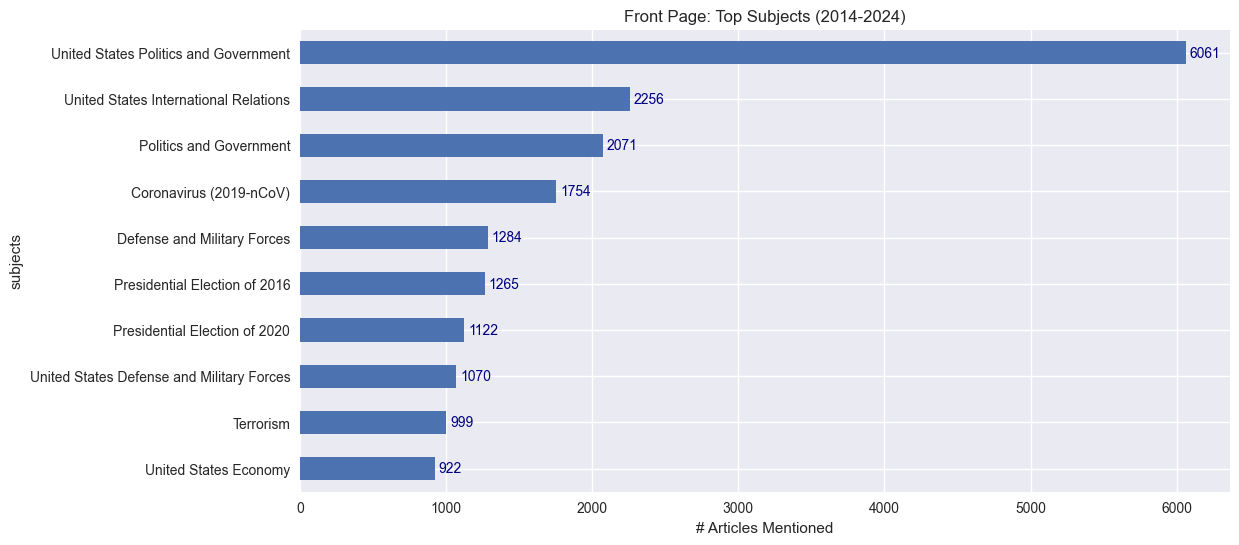

In [42]:
plt.figure(figsize=(12,6))


bars=front_pages['subjects'].apply(literal_eval).explode().value_counts().head(10).iloc[::-1].plot(kind='barh')


for bar in bars.containers:
    bars.bar_label(bar, label_type='edge', color='navy', fontsize=10, padding=3)
plt.xlabel('# Articles Mentioned')
plt.title('Front Page: Top Subjects (2014-2024)')

plt.show()

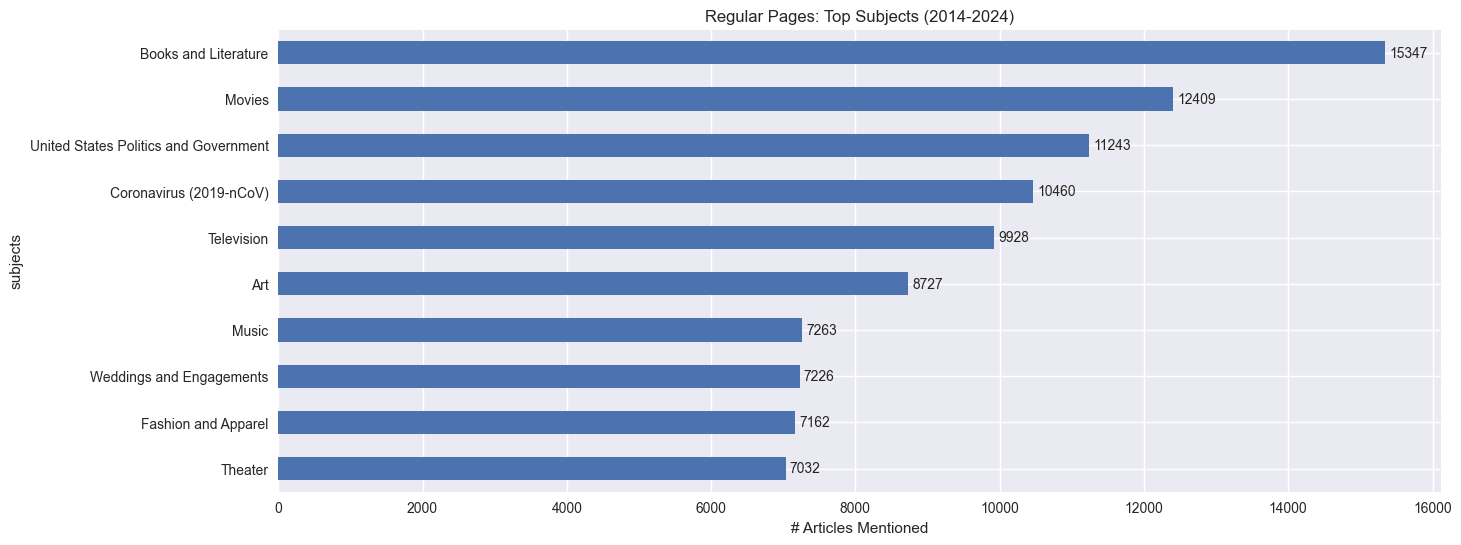

In [44]:
plt.figure(figsize=(15,6))


bars=rest['subjects'].dropna().apply(literal_eval).explode().value_counts().head(10).iloc[::-1].plot(kind='barh')


for bar in bars.containers:
    bars.bar_label(bar, label_type='edge', fontsize=10, padding=3)
plt.xlabel('# Articles Mentioned')
plt.title('Regular Pages: Top Subjects (2014-2024)')

plt.show()

## keywords: locations

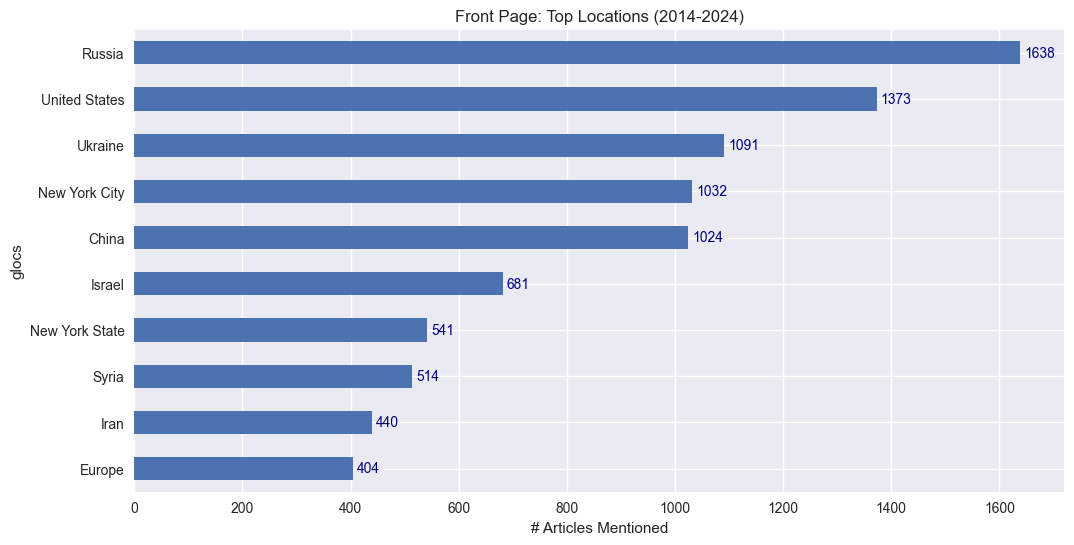

In [45]:
plt.figure(figsize=(12,6))


bars=front_pages['glocs'].apply(literal_eval).explode().value_counts().head(10).iloc[::-1].plot(kind='barh')


for bar in bars.containers:
    bars.bar_label(bar, label_type='edge', color='navy', fontsize=10, padding=3)
plt.xlabel('# Articles Mentioned')
plt.title('Front Page: Top Locations (2014-2024)')

plt.show()

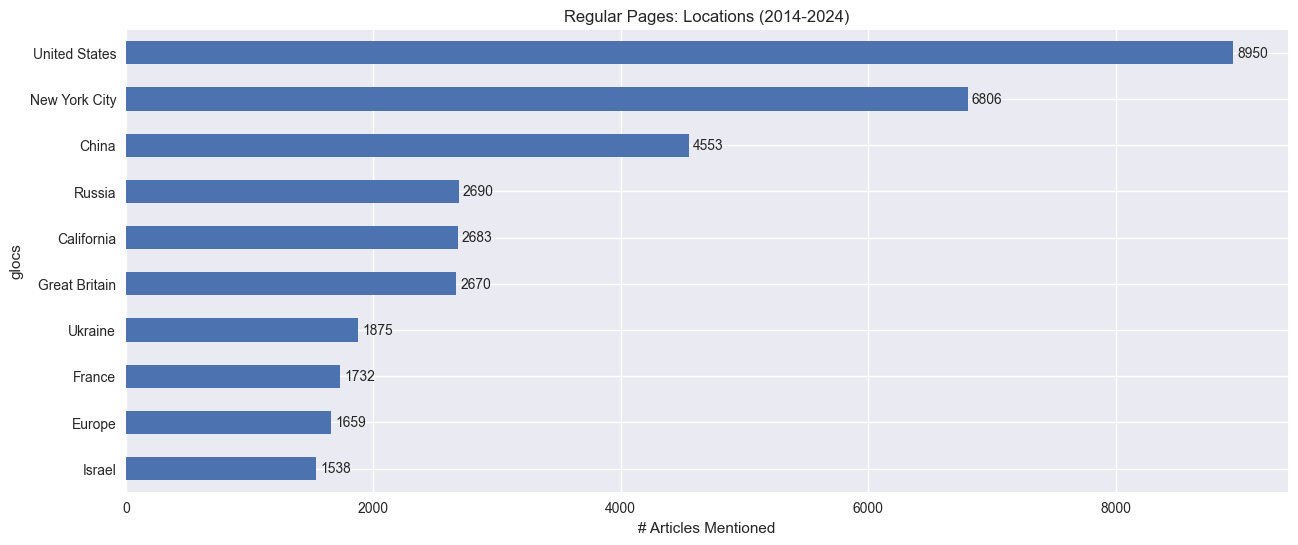

In [47]:
plt.figure(figsize=(15,6))


bars=rest['glocs'].dropna().apply(literal_eval).explode().value_counts().head(10).iloc[::-1].plot(kind='barh')


for bar in bars.containers:
    bars.bar_label(bar, label_type='edge', fontsize=10, padding=3)
plt.xlabel('# Articles Mentioned')
plt.title('Regular Pages: Locations (2014-2024)')

plt.show()

In [82]:
front_pages.columns

Index(['abstract', 'web_url', 'snippet', 'lead_paragraph', 'print_section',
       'print_page', 'source', 'multimedia', 'headline', 'keywords',
       'pub_date', 'document_type', 'news_desk', 'section_name',
       'subsection_name', 'byline', 'type_of_material', '_id', 'word_count',
       'uri', 'year', 'num_subjects', 'num_persons', 'num_glocs',
       'num_creatives', 'num_orgs', 'glocs', 'persons', 'subjects', 'orgs',
       'cworks'],
      dtype='object')

## people

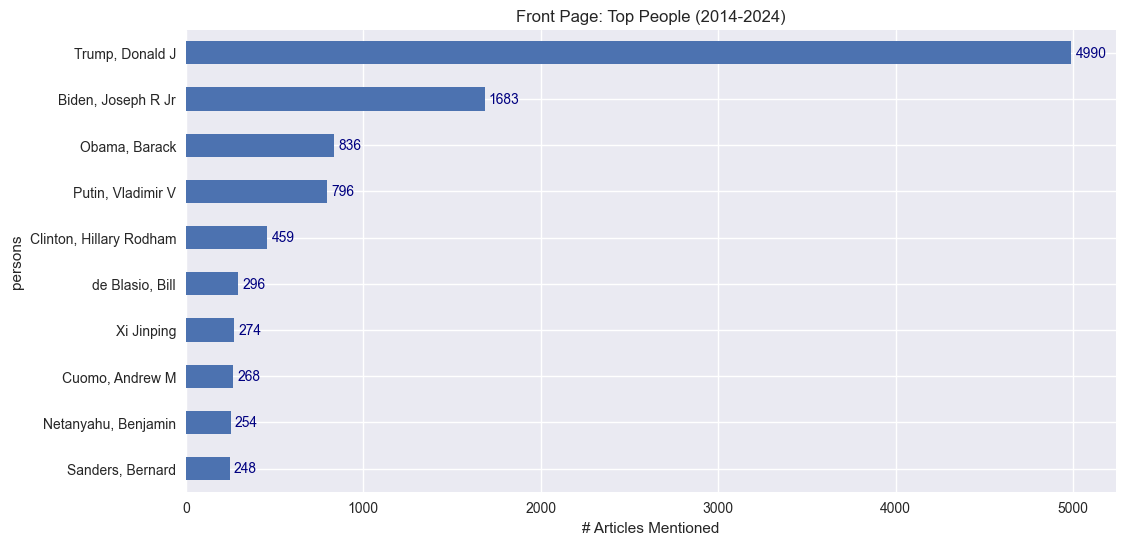

In [83]:
plt.figure(figsize=(12,6))


bars=front_pages['persons'].apply(literal_eval).explode().value_counts().head(10).iloc[::-1].plot(kind='barh')


for bar in bars.containers:
    bars.bar_label(bar, label_type='edge', color='navy', fontsize=10, padding=3)
plt.xlabel('# Articles Mentioned')
plt.title('Front Page: Top People (2014-2024)')

plt.show()

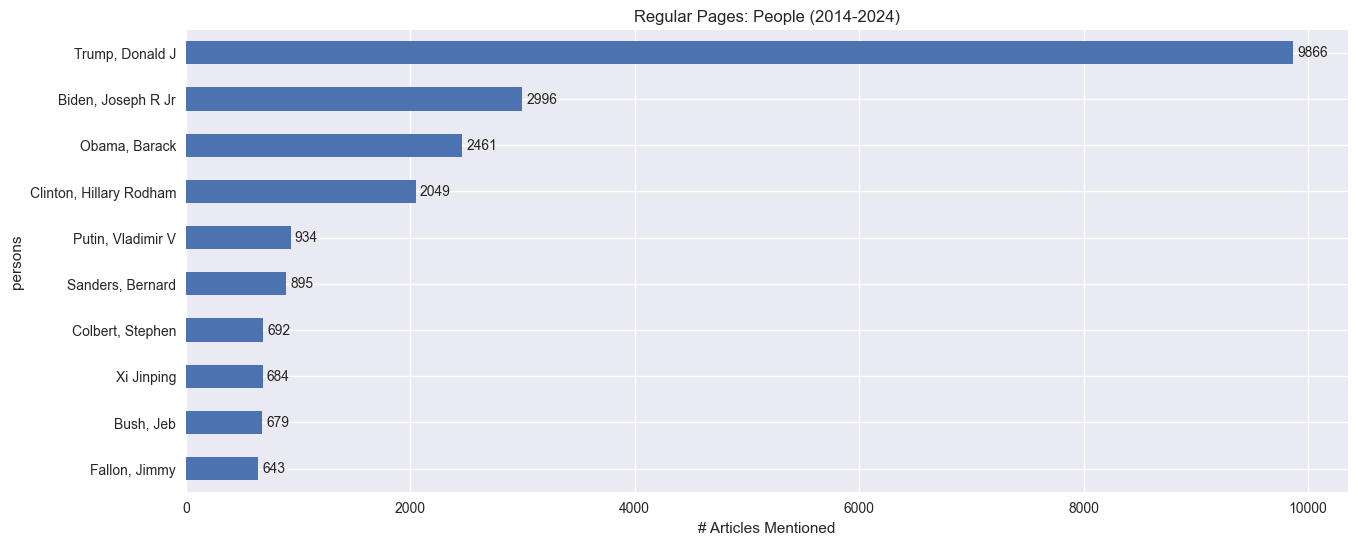

In [85]:
plt.figure(figsize=(15,6))


bars=rest['persons'].dropna().apply(literal_eval).explode().value_counts().head(10).iloc[::-1].plot(kind='barh')


for bar in bars.containers:
    bars.bar_label(bar, label_type='edge', fontsize=10, padding=3)
plt.xlabel('# Articles Mentioned')
plt.title('Regular Pages: People (2014-2024)')

plt.show()

## word count

<Axes: >

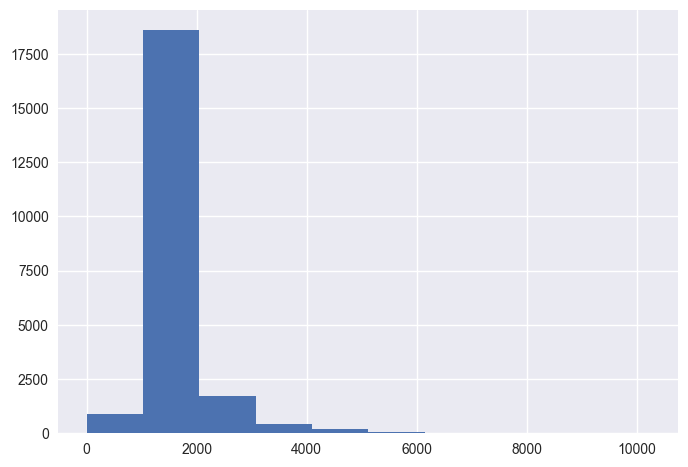

In [88]:
front_pages['word_count'].hist()